Title: Autism Screening Adult Data Set
 -----------------------------------------
### Informations :

    Number of Instances:704
    
    Attribute Characteristics: Integer
    
    Number of Attributes:21

    Date Donated 2017-12-24

    Associated Tasks: Classification

    Missing Values? Yes

    Number of Web Hits: 84051
### Dataset Content :
         Attribute                        Domain

       1. A1_Score                       {0,1}
       2. A2_Score                       {0,1}
       3. A3_Score                       {0,1}
       4. A4_Score                       {0,1}
       5. A5_Score                       {0,1}
       6. A6_Score                       {0,1}
       7. A7_Score                       {0,1}
       8. A8_Score                       {0,1}
       9. A9_Score                       {0,1}
      10. A10_Score                      {0,1}
      11. age                            numeric
      12. gender                         {f,m}
      13. ethnicity                      {White-European,Latino,Others,Black,Asian,'Middle Eastern ',Pasifika,'South asian',Hispanic,Turkish,others}
      14.jundice                         {no,yes}
      15.austim                          {no,yes}
      16.contry_of_res                   {'United States',Brazil,Spain,Egypt,'New Zealand',Bahamas,Burundi,Austria,Argentina,Jordan,Ireland,'United Arab Emirates',Afghanistan,Lebanon,'United Kingdom','South Africa',Italy,Pakistan,Bangladesh,Chile,France,China,Australia,Canada,'Saudi Arabia',Netherlands,Romania,Sweden,Tonga,Oman,India,Philippines,'Sri Lanka','Sierra Leone',Ethiopia,'Viet Nam',Iran,'Costa Rica',Germany,Mexico,Russia,Armenia,Iceland,Nicaragua,'Hong Kong',Japan,Ukraine,Kazakhstan,AmericanSamoa,Uruguay,Serbia,Portugal,Malaysia,Ecuador,Niger,Belgium,Bolivia,Aruba,Finland,Turkey,Nepal,Indonesia,Angola,Azerbaijan,Iraq,'Czech Republic',Cyprus}
      17.used_app_before                 {no,yes}
      18.result                          numeric
      19.age_desc                        {'18 and more'}
      20.relation                        {Self,Parent,'Health care professional',Relative,Others}
      21.Class/ASD                       {NO,YES}

### Dataset Description

    Feature	: Description
    index : The participant’s ID number
    AX_Score: Score based on the Autism Spectrum Quotient (AQ) 10 item screening tool AQ-10
    age : Age in years
    gender : Male or Female
    ethnicity: Ethnicities in text form
    jaundice : Whether or not the participant was born with jaundice?
    austsm : Whether or not anyone in tbe immediate family has been diagnosed with autism?
    country_of_res : Countries in text format
    used_app_before : Whether the participant has used a screening app
    result	Score from the AQ-10 screening tool
    age_desc : Age as categorical
    relation : Relation of person who completed the test
    Class/ASD :	Participant classification

## Importing Libraries

In [45]:
# For dataframe and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.io import arff

# Processing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Prepare Data for classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


# Classification
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

# Comparing Classification
from sklearn.metrics import RocCurveDisplay


## Reading Data

In [46]:
# Load dataset
dataset = pd.read_table('Autism-Adult-Data.arff', sep = ',')

In [47]:
df = dataset.copy()

In [48]:
# Rename columns
df.columns = ['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score','age','gender','ethnicity','jundice','austim','contry_of_res','used_app_before' ,'result' 'numeric','age_desc','relation','Class/ASD']

In [49]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,resultnumeric,age_desc,relation,Class/ASD
0,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
1,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
2,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
3,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,NO
4,1,1,1,1,1,0,1,1,1,1,...,m,Others,yes,no,'United States',no,9,'18 and more',Self,YES


In [50]:
df.index #Describe index

RangeIndex(start=0, stop=703, step=1)

In [51]:
df.shape

(703, 21)

In [52]:
df.count() #Number of non-NA values

A1_Score           703
A2_Score           703
A3_Score           703
A4_Score           703
A5_Score           703
A6_Score           703
A7_Score           703
A8_Score           703
A9_Score           703
A10_Score          703
age                703
gender             703
ethnicity          703
jundice            703
austim             703
contry_of_res      703
used_app_before    703
resultnumeric      703
age_desc           703
relation           703
Class/ASD          703
dtype: int64

## Feature Engineering

In [53]:
df.info() #Info on DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703 entries, 0 to 702
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         703 non-null    int64 
 1   A2_Score         703 non-null    int64 
 2   A3_Score         703 non-null    int64 
 3   A4_Score         703 non-null    int64 
 4   A5_Score         703 non-null    int64 
 5   A6_Score         703 non-null    int64 
 6   A7_Score         703 non-null    int64 
 7   A8_Score         703 non-null    int64 
 8   A9_Score         703 non-null    int64 
 9   A10_Score        703 non-null    int64 
 10  age              703 non-null    object
 11  gender           703 non-null    object
 12  ethnicity        703 non-null    object
 13  jundice          703 non-null    object
 14  austim           703 non-null    object
 15  contry_of_res    703 non-null    object
 16  used_app_before  703 non-null    object
 17  resultnumeric    703 non-null    in

Some columns are object and some of them has string Yes or No, we need to replace them to boolean (0, 1)

In [54]:
# Replace columns with number
df = df.replace("yes", 1)
df = df.replace("no", 0)
df = df.replace("YES", 1)
df = df.replace("NO", 0)
df = df.replace("f", 1)
df = df.replace("m", 0)

In [55]:
df.info() #Info on DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703 entries, 0 to 702
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         703 non-null    int64 
 1   A2_Score         703 non-null    int64 
 2   A3_Score         703 non-null    int64 
 3   A4_Score         703 non-null    int64 
 4   A5_Score         703 non-null    int64 
 5   A6_Score         703 non-null    int64 
 6   A7_Score         703 non-null    int64 
 7   A8_Score         703 non-null    int64 
 8   A9_Score         703 non-null    int64 
 9   A10_Score        703 non-null    int64 
 10  age              703 non-null    object
 11  gender           703 non-null    int64 
 12  ethnicity        703 non-null    object
 13  jundice          703 non-null    int64 
 14  austim           703 non-null    int64 
 15  contry_of_res    703 non-null    object
 16  used_app_before  703 non-null    int64 
 17  resultnumeric    703 non-null    in

In [56]:
# Show missing values
MissingValues = {col:df[df[col] == "?"].shape[0] for col in df.columns}
MissingValues

{'A1_Score': 0,
 'A2_Score': 0,
 'A3_Score': 0,
 'A4_Score': 0,
 'A5_Score': 0,
 'A6_Score': 0,
 'A7_Score': 0,
 'A8_Score': 0,
 'A9_Score': 0,
 'A10_Score': 0,
 'age': 2,
 'gender': 0,
 'ethnicity': 95,
 'jundice': 0,
 'austim': 0,
 'contry_of_res': 0,
 'used_app_before': 0,
 'resultnumeric': 0,
 'age_desc': 0,
 'relation': 95,
 'Class/ASD': 0}

### Replace '?' values of Age by mean

In [57]:
# Replace '?' values by NaN
for j in range(df.shape[0]):
    if(df.iloc[j,10]=='?'):
        df.iloc[j,10]=np.NaN

In [58]:
# Reaplace NaN value by mean
df.fillna(df.mean(), inplace= True)

### Replace '?' values of ethnicity by 'Others' and 'others' by 'Others'

In [59]:
# There is values that are the same : '?', 'Others' and 'others'
df['ethnicity'].unique()

array(['Latino', 'White-European', '?', 'Others', 'Black', 'Asian',
       "'Middle Eastern '", 'Pasifika', "'South Asian'", 'Hispanic',
       'Turkish', 'others'], dtype=object)

In [60]:
# Replace '?' with 'others'
df['ethnicity'] = df['ethnicity'].replace('?', 'others')

In [61]:
# Replace '?' with 'Others'
df['ethnicity'] = df['ethnicity'].replace('others', 'Others')

In [62]:
# Every missing values are now as 'Others'
df['ethnicity'].unique()

array(['Latino', 'White-European', 'Others', 'Black', 'Asian',
       "'Middle Eastern '", 'Pasifika', "'South Asian'", 'Hispanic',
       'Turkish'], dtype=object)

### Replace '?' values of relation by a  mode of relation

In [63]:
# Here we only have '?' as missing values
df['relation'].unique()

array(['Self', 'Parent', '?', "'Health care professional'", 'Relative',
       'Others'], dtype=object)

In [64]:
# Replace the missing value with modal value of the columns
df['relation'] = df['relation'].replace('?', df['relation'].mode()[0])

In [65]:
# Show results
df['relation'].unique()

array(['Self', 'Parent', "'Health care professional'", 'Relative',
       'Others'], dtype=object)

In [66]:
# No more missing values !
df.isnull().sum() #Number of NA values

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
resultnumeric      0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [67]:
# Now every columns has the right type
df.info() #Info on DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703 entries, 0 to 702
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         703 non-null    int64 
 1   A2_Score         703 non-null    int64 
 2   A3_Score         703 non-null    int64 
 3   A4_Score         703 non-null    int64 
 4   A5_Score         703 non-null    int64 
 5   A6_Score         703 non-null    int64 
 6   A7_Score         703 non-null    int64 
 7   A8_Score         703 non-null    int64 
 8   A9_Score         703 non-null    int64 
 9   A10_Score        703 non-null    int64 
 10  age              701 non-null    object
 11  gender           703 non-null    int64 
 12  ethnicity        703 non-null    object
 13  jundice          703 non-null    int64 
 14  austim           703 non-null    int64 
 15  contry_of_res    703 non-null    object
 16  used_app_before  703 non-null    int64 
 17  resultnumeric    703 non-null    in

    # : number of functions in the data framework
    Column: Features header in the Dataframe
    Non-null Count: Counter of nonzero values for each Dataframe function
    Type: type of data stored for each function of the data frame

## Summary

In [68]:
df.describe() #Statistical summary of DataFrame

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,jundice,austim,used_app_before,resultnumeric,Class/ASD
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000
mean,0.721195,0.452347,0.456615,0.495021,0.499289,0.284495,0.416785,0.648649,0.324324,0.574680,0.477952,0.098151,0.129445,0.017070,4.873400,0.268848
std,0.448731,0.498078,0.498469,0.500331,0.500355,0.451495,0.493378,0.477732,0.468455,0.494743,0.499869,0.297730,0.335931,0.129623,2.502914,0.443676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000


    count: number of examples counted for the selected function
    mean: arithmetic mean for the selected function
    std: standard deviation for the selected function
    min: minimum value presented by the examples for the selected function
    25%: first quartile calculated on the examples for the selected function
    50%: second quartile calculated on the examples for the selected function
    75%: third quartile calculated on examples for selected feature
    max: maximum value presented by the examples for the selected function

In [69]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,resultnumeric,age_desc,relation,Class/ASD
0,1,1,0,1,0,0,0,1,0,1,...,0,Latino,0,1,Brazil,0,5,'18 and more',Self,0
1,1,1,0,1,1,0,1,1,1,1,...,0,Latino,1,1,Spain,0,8,'18 and more',Parent,1
2,1,1,0,1,0,0,1,1,0,1,...,1,White-European,0,1,'United States',0,6,'18 and more',Self,0
3,1,0,0,0,0,0,0,1,0,0,...,1,Others,0,0,Egypt,0,2,'18 and more',Self,0
4,1,1,1,1,1,0,1,1,1,1,...,0,Others,1,0,'United States',0,9,'18 and more',Self,1


## Visualization

0    367
1    336
Name: gender, dtype: int64


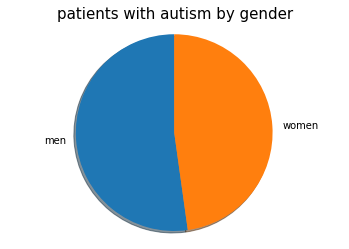

In [70]:
# Let's see the diversity of autism
print(df['gender'].value_counts())
men = df.value_counts(["gender"])[0]
women = df.value_counts(["gender"])[1]

name = ['men', 'women']
data = [men, women]
plt.title("patients with autism by gender", fontsize = 15)

plt.pie(data, labels=name, startangle=90, shadow=True)
plt.axis('equal')
plt.show()

0    612
1     91
Name: austim, dtype: int64


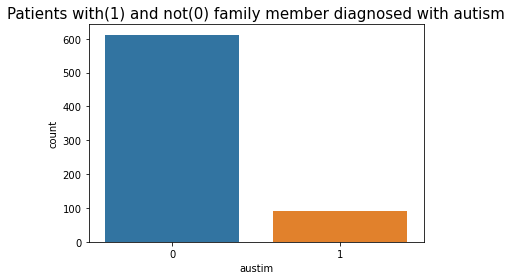

In [71]:
# Let's see if Patients has family member diagnosed with autism
print(df['austim'].value_counts())
sns.countplot(x="austim", data=df)
plt.title("Patients with(1) and not(0) family member diagnosed with autism", fontsize = 15)
plt.show()

<AxesSubplot:title={'center':'Patients with autism by countries'}, xlabel='contry_of_res', ylabel='count'>

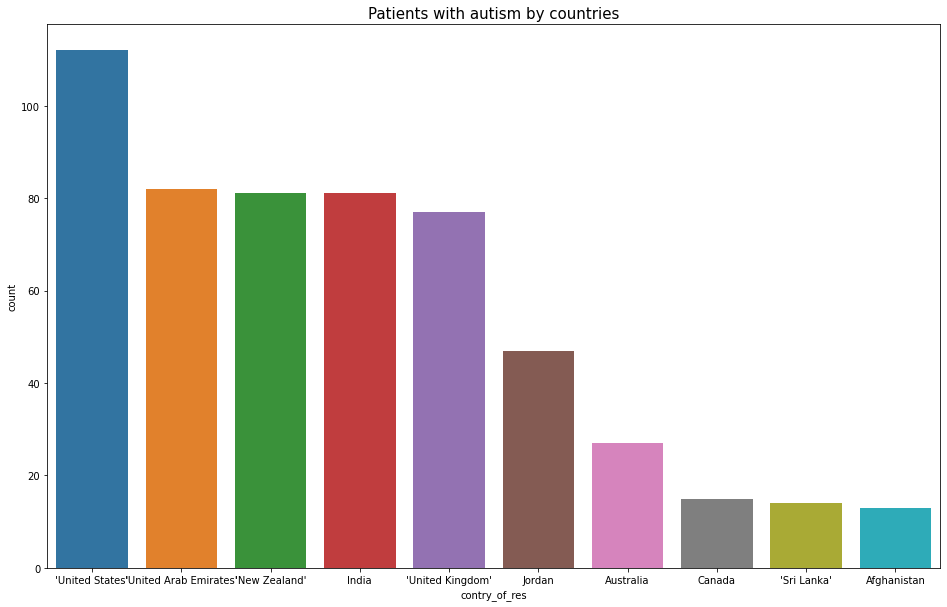

In [72]:
# The top 10 countries with autism
plt.figure(figsize = (16, 10))
plt.title("Patients with autism by countries", fontsize = 15)
plt.xlabel('contries')
plt.ylabel('number of austim')
order=df["contry_of_res"].value_counts().nlargest(10).index
# plt.bar(df.value_counts(["contry_of_res"])[1],df['austim'])
sns.countplot(x="contry_of_res", data=df, order=order)

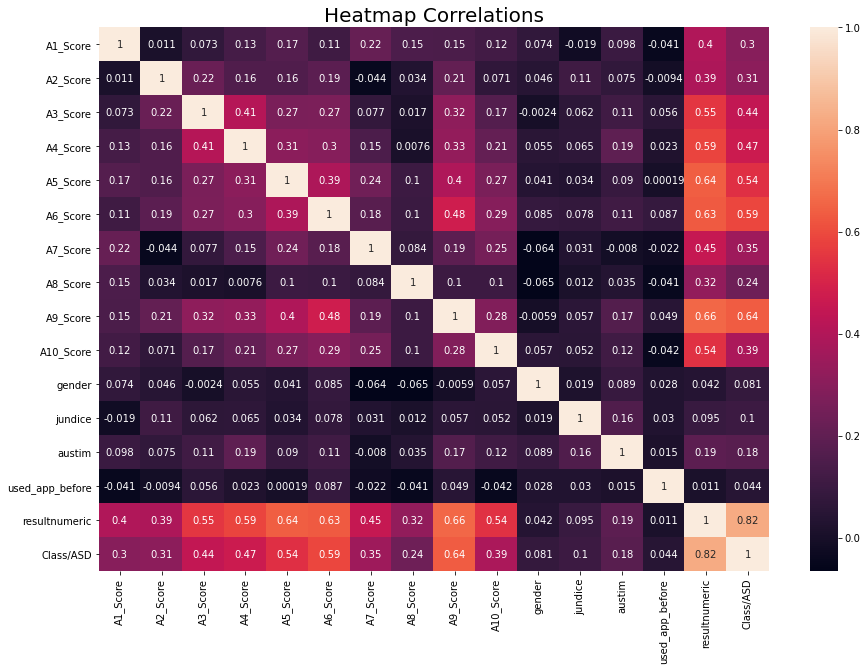

In [73]:
# Correlation between dataset columns
plt.figure(figsize = (15, 10))
plt.title("Heatmap Correlations", fontsize = 20)
sns.heatmap(df.corr(), annot = True)
plt.show()

## Pré-processing

In [74]:
# Dropp Unwanted columns
df.drop(['age_desc'], axis = 1, inplace = True)

Split the data 

In [75]:
X = df.drop("Class/ASD", axis = 1)    # select all other feature except "Class/ASD" for training
y = df['Class/ASD']

Due to the presence of data expressed with different location, normalization must be performed by using the get_dummies() method.

In [76]:
X = pd.get_dummies(X)

The data need to be split in trainning set and testing set

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8)

In [78]:
print(f"X = {X.shape}")
print(f"Y = {y.shape}")

X = (703, 143)
Y = (703,)


In [79]:
print(f"X_train = {X_train.shape}")
print(f"Y_train = {y_train.shape}\n")
print(f"X_test = {X_test.shape}")
print(f"Y_test = {y_test.shape}")

X_train = (140, 143)
Y_train = (140,)

X_test = (563, 143)
Y_test = (563,)


## Support Vector Classification

In [36]:
# Apply SVC
svc =SVC(random_state=3)
svc.fit(X_train,y_train)
pred_svc = svc.predict(X_test)
print(classification_report(y_test,pred_svc))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_svc))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_svc))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_svc)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       409
           1       1.00      0.88      0.93       154

    accuracy                           0.97       563
   macro avg       0.98      0.94      0.96       563
weighted avg       0.97      0.97      0.97       563

Mean Absolute Error: 0.03374777975133215
Mean Squared Error: 0.03374777975133215
Root Mean Squared Error: 0.18370568785786723


accuracy = 90% 

SVC show strong results, we could use SVC to classifie our dataset.

In [37]:
A = np.array([ round(metrics.precision_score(y_test, pred_svc),4),
    round(metrics.recall_score(y_test, pred_svc),4),
    round(metrics.f1_score(y_test, pred_svc),4)])
A = np.reshape(A, (1, 3))
A

array([[1.    , 0.8766, 0.9343]])

## Random Forest Classifier

In [38]:
# Apply RFC
rfc = RandomForestClassifier(random_state=3) 
rfc.fit(X_train, y_train)
pred_RFR = rfc.predict(X_test) 
print(classification_report(y_test,pred_RFR))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_RFR))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_RFR))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_RFR)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       409
           1       1.00      0.90      0.95       154

    accuracy                           0.97       563
   macro avg       0.98      0.95      0.96       563
weighted avg       0.97      0.97      0.97       563

Mean Absolute Error: 0.028419182948490232
Mean Squared Error: 0.028419182948490232
Root Mean Squared Error: 0.16857990078443585


In [39]:
B = np.array([ round(metrics.precision_score(y_test, pred_RFR),4),
    round(metrics.recall_score(y_test, pred_RFR),4),
    round(metrics.f1_score(y_test, pred_RFR),4)])
B = np.reshape(B, (1, 3))
B

array([[1.    , 0.8961, 0.9452]])

## Classification Comparison

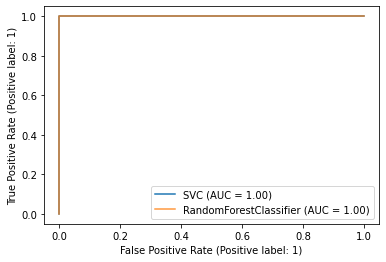

In [40]:
svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax, alpha=0.8)
regressor_disp = ()
plt.show()

We cannot clearly see the difference with the Roc curve even if we can briefly see that RFC is slightly more eccentric than an RFC.

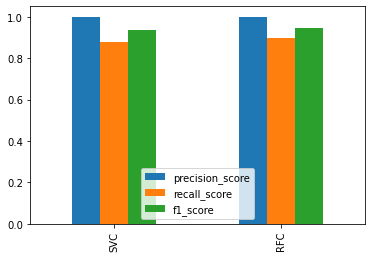

[array([[1.    , 0.8766, 0.9343]]), array([[1.    , 0.8961, 0.9452]])]


In [80]:
# plot scoring to see the difference
Data = np.reshape([A, B], (2, 3))
fig = pd.DataFrame(Data, columns=["precision_score", "recall_score", "f1_score"], index=['SVC', 'RFC'])
fig.plot.bar();
plt.show()
print([A, B])

We will use Random Forest Classifier. He has the best scores and is the most eccentric curve in the ROC curve.